In [1]:
%matplotlib inline

In [2]:
import scipy as sp
import scipy.interpolate
import numpy as np
import glob #to read the files
from sklearn.decomposition import PCA
from ipywidgets import *
from tabulate import tabulate #to export in table format
from scipy import interpolate
import scipy.interpolate as interp
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate
from astropy import constants as const

In [3]:
filter_y = []
filter_z = []

In [4]:
file = open("V_tel_ccd_atm_ext_1.2.txt")
lines = file.readlines()
file.close()

In [5]:
for line in lines:

    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    filter_y.append(co[0])
    filter_z.append(co[1])

filter_y = np.array(filter_y, dtype=float)
filter_z = np.array(filter_z, dtype=float)

In [6]:
f_filter = interp1d(filter_y, filter_z)

<IPython.core.display.Javascript object>


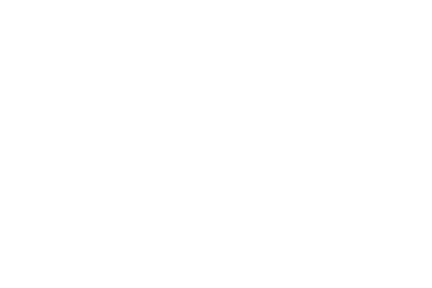

In [7]:
%matplotlib notebook
plt.plot(filter_y, filter_z, 'k')
plt.show()

In [8]:
x = np.linspace(-10,50,61)
y = np.linspace(3300,8500,521)

In [9]:
file = open("max_valuesV.txt")
lines = file.readlines()
file.close()

snname = []
maxvalue = []

for line in lines:

    if line.startswith('#'): continue
    co=line.rstrip().replace('INDEF','Nan').split()

    maxvalue.append(co[1])
    snname.append(co[0])

maxvalue = np.array(maxvalue, dtype=float)

In [10]:
sn_names=glob.glob("*.dat")
print(len(sn_names))

49


In [11]:
for i in range(0,len(sn_names)):

    sn_names[i] = sn_names[i][:-4]

In [12]:
factors = []
names = []

In [13]:
#hist = []

In [14]:
max_list = []

In [15]:
list_data = []
for k in range(0,len(sn_names)):
    
    x_lc = []
    z_lc = []

    print(sn_names[k])

    N = sn_names[k]+".dat"


    file = open(N)
    lines = file.readlines()
    file.close()

    xtemp = []

    for line in lines:

        if line.startswith('#'): continue
        co=line.rstrip().replace('INDEF','Nan').split()

        xtemp.append(co[0])

    xtemp = np.array(xtemp, dtype=float)


    z = np.reshape(xtemp, (521, 61))

    zz = []
    xx = []
    yy = []

    for i in range(0,len(y)):

        for j in range(0,len(x)):

            zz.append(z[i][j])
            xx.append(x[j])
            yy.append(y[i])

    
    for j in range(0,len(x)):

        y_temp = []
        z_temp = []

        for i in range(0,len(xx)):

            if xx[i] == x[j]:

                y_temp.append(yy[i])
                z_temp.append(zz[i])

        f = interp1d(y_temp, z_temp)

        def S(x): return f(x)*f_filter(x)
        
        z_lc.append(integrate.quad(S, min(filter_y), max(filter_y))[0])
        x_lc.append(x[j])        
        
    list_data.append([x_lc, z_lc]) 
    
        
    #print(z_lc)
        
    #print(j)

    maxvaluecalc = max(z_lc)
    
    #print(maxvaluecalc)
    if sn_names[k] in snname:
        idx = snname.index(sn_names[k])
        max_list.append([maxvaluecalc, maxvalue[idx], sn_names[k]])  
        
        factors.append(maxvalue[idx]/maxvaluecalc)
        names.append(sn_names[k])
        


SN2003du
SN2001V
SN2007bc
SN2005na
SN2009aa
SN2002de
SN2007qe
SN1998dh
SN2002bo
SN2007F
SN2007ci
SN2012fr
SN2008ar
SN2001ep
SN2005el
SN2000cx
SN2002jy
SN1999aa
SN1995D
SN1998aq
SN2003fa
SN1996X
SN2005cf
SN1972E
SN2006bt
SN2007af
SN1999ac
SN2007le
SN2005bl
SN1994ae
SN2005am
SN2008s1
SN2009Y
SN2004dt
SN2008bf
SN2009dc
SN2007kk
SN2007hj
SN1994D
SN2013ew
SN2006is
SN2002fk
SN2007A
SN2010ae
iPTF14bdn
SN2002cs
SN1999by
SN2008Z
SN2007on


In [16]:
max_list

[[7.663521589544212e-12, 2.23102, 'SN2003du'],
 [4.616867215139736e-12, 0.935451, 'SN2001V'],
 [7.802734232121088e-13, 0.262264, 'SN2007bc'],
 [6.840689316767094e-13, 0.20126, 'SN2005na'],
 [6.277650243184282e-13, 0.142746, 'SN2002de'],
 [5.318278148748731e-13, 0.233603, 'SN2007qe'],
 [8.172022283010746e-12, 1.51815, 'SN1998dh'],
 [5.604890242285135e-12, 2.07239, 'SN2002bo'],
 [8.577620301048538e-13, 0.261038, 'SN2007F'],
 [8.56483827072437e-13, 0.257244, 'SN2007ci'],
 [3.364386665524008e-11, 9.59894, 'SN2012fr'],
 [9.576658837274743e-13, 0.182483, 'SN2008ar'],
 [2.351417967028973e-12, 0.632208, 'SN2001ep'],
 [1.3159933479844382e-12, 0.492098, 'SN2005el'],
 [1.8602152236832198e-11, 3.03961, 'SN2000cx'],
 [2.0123448286533424e-12, 0.675013, 'SN1999aa'],
 [9.348329389728702e-12, 2.87617, 'SN1995D'],
 [2.3549572671376285e-11, 6.1536, 'SN1998aq'],
 [3.3554272894952036e-13, 0.11468, 'SN2003fa'],
 [9.084941205934851e-12, 2.88604, 'SN1996X'],
 [8.566621331629671e-12, 2.28397, 'SN2005cf'],
 [3.

<IPython.core.display.Javascript object>


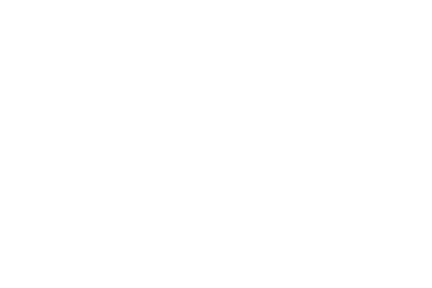

In [17]:
%matplotlib notebook

for i in range(0,len(list_data)):
    
    plt.plot(list_data[i][0],list_data[i][1])
    
    
#plt.ylim(0,7*10**(-11))
plt.show()

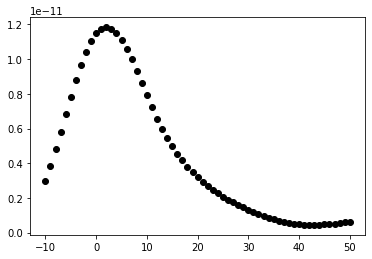

In [18]:
%matplotlib inline
plt.plot(x_lc,z_lc,'ko')
plt.show()

In [19]:
max(z_lc)

1.1840199969133008e-11

In [20]:
z_lc

[2.9658838327339167e-12,
 3.8477729607136945e-12,
 4.8029643130009165e-12,
 5.807546526945365e-12,
 6.832042209862588e-12,
 7.842756814909316e-12,
 8.80369098751938e-12,
 9.678891823141611e-12,
 1.0434901074645468e-11,
 1.1043227459667872e-11,
 1.1482526525188947e-11,
 1.1740089783167491e-11,
 1.1840199969133008e-11,
 1.175491268045669e-11,
 1.1504631661942466e-11,
 1.11096950346236e-11,
 1.0595809662724412e-11,
 9.991905993479764e-12,
 9.327971473321724e-12,
 8.632820524557385e-12,
 7.932426801995155e-12,
 7.248566347441363e-12,
 6.57871512461052e-12,
 5.9971048952364554e-12,
 5.4652001391942285e-12,
 4.98353001001157e-12,
 4.549705578506222e-12,
 4.159536992959521e-12,
 3.808000800592819e-12,
 3.4900520318750753e-12,
 3.2011068271687893e-12,
 2.9373086272967334e-12,
 2.6955608958614676e-12,
 2.473408266114577e-12,
 2.2688510531820004e-12,
 2.0801430898207083e-12,
 1.9056630580498127e-12,
 1.7438376907572467e-12,
 1.5931683488751632e-12,
 1.452298614903768e-12,
 1.3201247745208693e-12

In [21]:
save_path = '/home/joao/Documentos/PCA'

In [22]:

table = []
for l in range(0,len(names)):
    table.append((names[l],factors[l]))

name_of_file = "factors"

completeName = os.path.join(save_path, name_of_file+".txt")

f = open(completeName, 'w')
f.write(tabulate(table, tablefmt="plain"))
f.close()


In [23]:
factors

[291122034945.9066,
 202615963684.7358,
 336118073739.2697,
 294210116379.20044,
 227387628284.93192,
 439245548025.65454,
 185774089622.36475,
 369746758708.1738,
 304324498915.03174,
 300348928804.98444,
 285310249810.5684,
 190549755505.26108,
 268862451875.70697,
 373936540601.586,
 163400985074.2745,
 335436049721.01996,
 307666737027.91614,
 261304104574.24115,
 341774653734.94257,
 317672941913.44446,
 266612694968.4502,
 300184966925.90826,
 275046560110.7417,
 221992822913.893,
 235767005746.3114,
 334932207238.37427,
 322150078591.0638,
 276965822757.0929,
 276055662389.40314,
 365955250921.70447,
 345695580977.8621,
 318506099718.3774,
 290827946051.1494,
 344005706798.5419,
 242927636846.26093,
 396721893809.51105,
 393296369423.56354,
 215283201528.27484,
 250004871679.79486,
 287280891396.4342,
 362646796467.01404,
 310817703847.3289,
 135804314558.28482,
 328329758799.22235]

In [24]:
%matplotlib inline
plt.hist(histogram, bins=30)
plt.show()

NameError: name 'histogram' is not defined